In [1]:
import gym
from gym.envs.registration import register
register(
    id='D4x4-FrozenLake-v0',
    entry_point='gym.envs.toy_text.frozen_lake:FrozenLakeEnv',
    kwargs={'map_name': '4x4',
            'is_slippery': False})

env = gym.make('D4x4-FrozenLake-v0')

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns
def plot_graph(fcn,title, x_label,y_label):
    fig, ax = plt.subplots()
    ax.plot(fcn)
    ax.set(xlabel=x_label, ylabel=y_label,title=title)
    ax.grid()
    plt.show()
def show_convergence(values,V_optimal):
    moving_errors=[]
    optim_errors=[]
    for i in range(1,len(values)):
        moving_errors.append(np.max(np.abs(values[i]-values[i-1])))
        optim_errors.append(np.max(np.abs(V_optimal-values[i-1])))
    plot_graph(moving_errors,"Convergence of value as V(k)-V(k-1)","Iteration","Error")
    plot_graph(optim_errors,"Convergence of value as V*-V(k)","Iteration","Error")
def grid_plot(vals,title):
    ax=plt.axes()
    sns.heatmap(vals,annot=True)
    ax.set_title(title)
    plt.show()

<h1>Value Iteration</h1>
<p> Do until convergence</p>
\begin{equation}
V = \max_a(R+\gamma PV(s'|s,a))
\end{equation}

In [3]:
import numpy as np
discount_factor =0.9
value_function = list()
def oneStep(s,V,env):
    actions = [0,0,0,0]
    for action in range(env.nA):
        for prob,next_state,reward,done in env.P[s][action]:
#             print(prob)
            actions[action] += (prob*(reward+0.9*V[int(next_state)]))
#     print(s,actions)
    return actions
    
def valueIteration(env,threshold = 0.000001):
    V = np.zeros(env.nS)
    i=0
    while True:
        error = 0
        for state in range(env.nS):
            a = oneStep(state,V,env)
            max_value = np.max(a)
            error = max(error, np.abs(max_value - V[state]))
            V[state] = max_value
        value_function.append(V.copy())
        if error < threshold:
            break
        i+=1
        
        print("Iteration {} value = {}".format(i,V))
    return value_function
values = valueIteration(env)

Iteration 1 value = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Iteration 2 value = [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.9 0.  0.  0.9 1.  0. ]
Iteration 3 value = [0.   0.   0.   0.   0.   0.   0.81 0.   0.   0.81 0.9  0.   0.   0.9
 1.   0.  ]
Iteration 4 value = [0.     0.     0.729  0.6561 0.     0.     0.81   0.     0.729  0.81
 0.9    0.     0.     0.9    1.     0.    ]
Iteration 5 value = [0.     0.6561 0.729  0.6561 0.6561 0.     0.81   0.     0.729  0.81
 0.9    0.     0.     0.9    1.     0.    ]
Iteration 6 value = [0.59049 0.6561  0.729   0.6561  0.6561  0.      0.81    0.      0.729
 0.81    0.9     0.      0.      0.9     1.      0.     ]


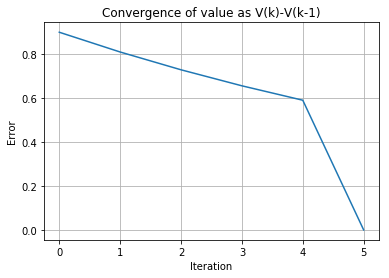

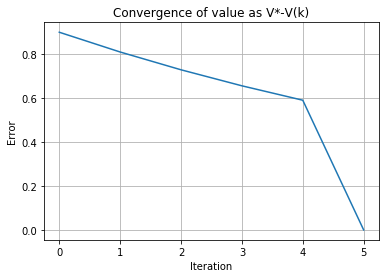

In [4]:
show_convergence(values,values[-1])

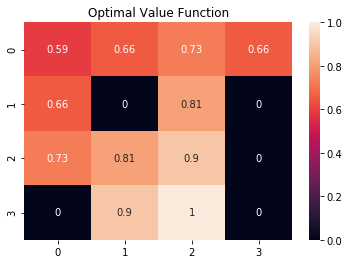

In [5]:
optimal_value_function = values[-1].reshape((4,-1))
grid_plot(optimal_value_function,"Optimal Value Function")

<h1>Policy Iteration</h1>
<p>Until convergence</p>
<ol>
<li>Start with a Policy</li>
<li>Evaluate Policy</li>
<li>Improve Policy</li>
</ol>
Value for a policy is given as:
\begin{equation}
V(s)=\sum_{s'\in S}T(s, \pi(s),s') [R(s, \pi(s),s') + \gamma V(s')] , ∀s ∈ S
\end{equation}
Policy improvement step is given as:
\begin{equation}
\pi(s) = arg\max_a(\sum_{s' \in S}T(s, \pi(s),s') [R(s, \pi(s),s') + \gamma V(s')])
\end{equation}

In [6]:
def evaluatePolicy(policy,env,threshold = 0.0001):
    V = np.zeros(env.nS)
    while True:
        error = 0
        for s in range(env.nS):
            v = 0
            for a, T in enumerate(policy[s]):
                for  prob, next_state, reward, done in env.P[s][a]:
                    v += T * prob * (reward + discount_factor * V[next_state])
            error = max(error, np.abs(v - V[s]))
            V[s] = v
        if error < threshold:
            break
#     print(V)
    return V
        

def improvePolicy(env):
    policy = np.zeros([env.nS, env.nA]) / env.nA
    value_function=list()
    i=0
    while True:
        V = evaluatePolicy(policy,env)
        stable = True
        actions = list()
        for state in range(env.nS):
            action = np.argmax(policy[state])
            action_values = oneStep(state, V,env)
            best_action = np.argmax(action_values)
            if action != best_action:
                stable = False
            policy[state] = np.eye(env.nA)[best_action]
            actions.append(best_action)
        i+=1
        print("Iteration {} value = {}".format(i,V))
        value_function.append(V.copy())
        if stable:
            V = evaluatePolicy(policy,env)
            value_function.append(V.copy())
            return policy, V, value_function, actions
policy, V, all_values, actions = improvePolicy(env)
print(actions)

Iteration 1 value = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Iteration 2 value = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Iteration 3 value = [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.9 0.  0.  0.9 1.  0. ]
Iteration 4 value = [0.   0.   0.   0.   0.   0.   0.81 0.   0.   0.81 0.9  0.   0.   0.9
 1.   0.  ]
Iteration 5 value = [0.     0.     0.729  0.6561 0.     0.     0.81   0.     0.729  0.81
 0.9    0.     0.     0.9    1.     0.    ]
Iteration 6 value = [0.     0.6561 0.729  0.6561 0.6561 0.     0.81   0.     0.729  0.81
 0.9    0.     0.     0.9    1.     0.    ]
Iteration 7 value = [0.59049 0.6561  0.729   0.6561  0.6561  0.      0.81    0.      0.729
 0.81    0.9     0.      0.      0.9     1.      0.     ]
[1, 2, 1, 0, 1, 0, 1, 0, 2, 1, 1, 0, 0, 2, 2, 0]


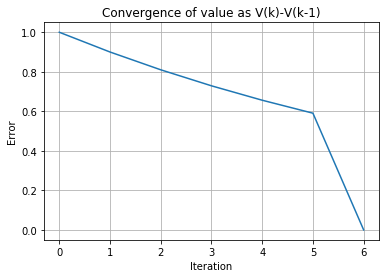

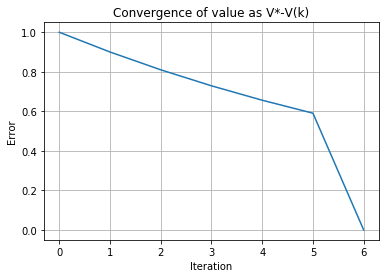

In [7]:
show_convergence(all_values,values[-1])

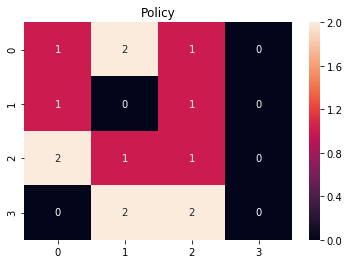

In [8]:
actions = np.array(actions).reshape((4,-1))
grid_plot(actions,"Policy")

In [9]:
del env
register(
    id='D4x4-FrozenLake-v1',
    entry_point='gym.envs.toy_text.frozen_lake:FrozenLakeEnv',
    kwargs={'map_name': '4x4'})

env1 = gym.make('D4x4-FrozenLake-v1')

In [10]:
values = valueIteration(env1)
policy, V, all_values, actions = improvePolicy(env1)

Iteration 1 value = [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.33333333 0.        ]
Iteration 2 value = [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.1        0.
 0.         0.1        0.46333333 0.        ]
Iteration 3 value = [0.         0.         0.         0.         0.         0.
 0.03       0.         0.         0.06       0.166      0.
 0.         0.187      0.52843333 0.        ]
Iteration 4 value = [0.         0.         0.009      0.0027     0.         0.
 0.0525     0.         0.018      0.1113     0.20767    0.
 0.         0.24802    0.56626933 0.        ]
Iteration 5 value = [0.         0.0027     0.01926    0.007398   0.0054     0.
 0.068079   0.         0.04041    0.14883    0.2349535  0.
 0.         0.2889358  0.58989487 0.        ]
Iteration 6 value = [0.00243    0.007317   0.0284211  0.01296513 0.014472   0.
 

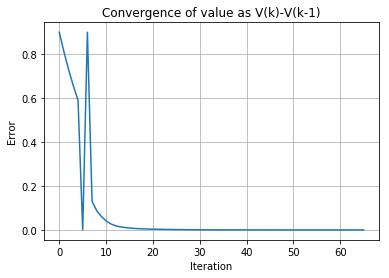

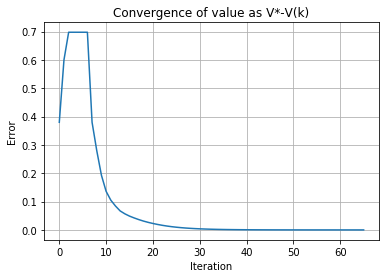

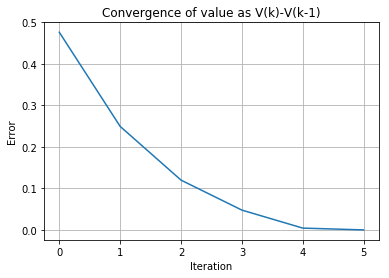

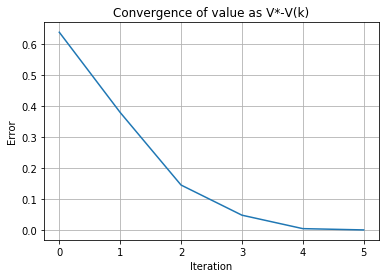

In [13]:
show_convergence(values,values[-1])
show_convergence(all_values,values[-1])

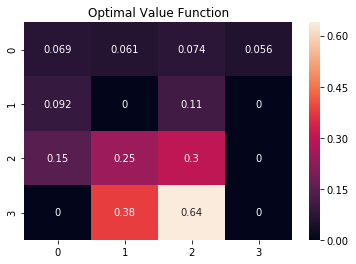

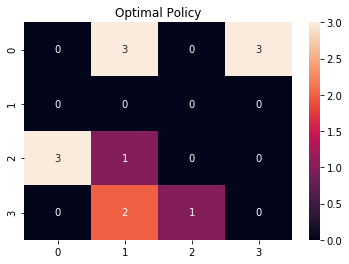

In [14]:
optimal_value_function = values[-1].reshape((4,-1))
actions = np.array(actions).reshape((4,-1))
grid_plot(optimal_value_function,"Optimal Value Function")
grid_plot(actions,"Optimal Policy")